In [7]:
#Vil vurdere å dele inn datasetet i 10 klasser og ikke 99. Forventer mye av modellen vår, men ikke at den 
#er så mye bedre enn en et menneske til å predikere eksakt alder. Ser derfor på om den kan se hvilket 10år 
def classify(num):
    if(num > 100):
        return 10
    return num//10

In [9]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import numpy as np

IMAGE_SIZE = (150,150)

x = []
y = []

folder = './face_age'
set = os.listdir(folder)
num_classes = 0

for i in set:
    num_classes += 1
    for file in os.listdir(f"{folder}/{i}"):
        if file[-4:]=='.png':
            image=keras.preprocessing.image.load_img(f"{folder}/{i}/{file}", grayscale=False, color_mode='rgb', target_size=(150,150))
            x_arr = keras.preprocessing.image.img_to_array(image)
            y.append(classify(int(i[-3:])))
            x.append(x_arr)
#print(f"Det er {num_classes} klasser")
print(len(x))
print(len(y))

9778
9778


In [10]:
import os
x_test = []
y_test = []

folder = './test'
set = os.listdir(folder)
for i in set:
    for file in os.listdir(f"{folder}/{i}"):
        if file[-4:]=='.jpg':
            image=keras.preprocessing.image.load_img(f"{folder}/{i}/{file}", grayscale=False, color_mode='rgb', target_size=(200,200))
            x_arr = keras.preprocessing.image.img_to_array(image)
            y_test.append(classify(int(i[-3:])))
            x_test.append(x_arr)
print(len(x_test))
len(x_test)

3292


3292

In [12]:
x = np.asarray(x)
y = np.asarray(y)
x = x.astype('float32')
x /= 255.0

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
x_test = x_test.astype('float32')
x_test /= 255.0

print('Min: %.3f, Max: %.3f' % (x.min(), x.max()))
print('Min: %.3f, Max: %.3f' % (x_test.min(), x_test.max()))

Min: 0.000, Max: 0.004
Min: 0.000, Max: 1.000


In [13]:
print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)

(9778, 150, 150, 3)
(9778,)
(3292, 200, 200, 3)
(3292,)


8


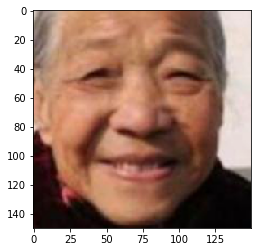

In [14]:
import matplotlib.pyplot as plt
#Se et tilfeldig bilde sammen med alder slik at innlesing stemmer
test = tf.keras.preprocessing.image.array_to_img(x[6300])
plt.imshow(test)
print(y[6300])

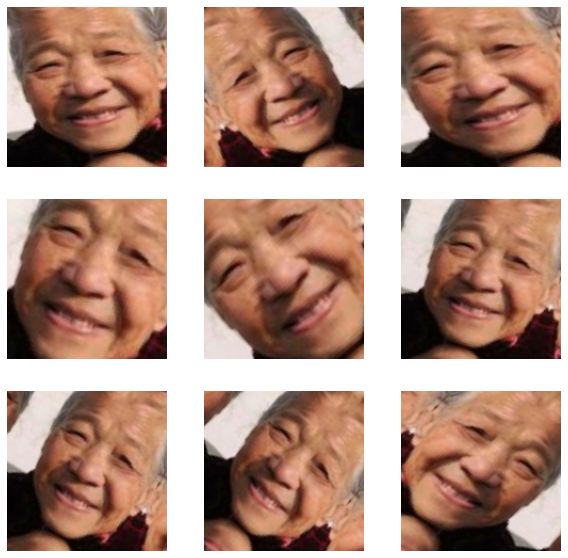

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=45,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode='reflect',
    horizontal_flip = True)

test = x[6300]
test = test.reshape((1,) + test.shape)
i = 0
plt.figure(figsize=(10, 10))
for batch in datagen.flow(test, batch_size=1):
    if i >= 9:
        break
    image = batch[0,:,:,:]
    sheesh = tf.keras.preprocessing.image.array_to_img(image)
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(sheesh)
    plt.axis("off")
    i += 1
    

In [2]:
from tensorflow.keras import layers
from tensorflow import keras
def build_model():
    model = keras.Sequential()
    model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Flatten()) 
    model.add(layers.Dense(11, activation="softmax")) 
    return model

model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 99, 99, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 313632)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 11)                3449963   
Total params: 3,450,859
Trainable params: 3,450,859
Non-trainable params: 0
_________________________________________________________________


In [21]:
epochs = 50
batch_size= 20
print(len(x))
steps_per_epoch = 100

#Antall bilder = batch * steps = 20 * 100 = 2000

9778


9720

In [59]:
model = build_model()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_history = model.fit(
            datagen.flow(x,y,batch_size=batch_size),
            steps_per_epoch = steps_per_epoch,
            validation_data = (x_train,y_train),
            epochs = epochs,
            verbose=True)

#model.evaluate() Kan brukes for å sjekke modellen, men det er nok bedre å gjøre det direkte i mo del_fit.

NameError: name 'build_model' is not defined

In [ ]:
model.save('saved_model/')

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def test_model(model, image_path):
    image = keras.preprocessing.image.load_img(image_path, grayscale=False, color_mode='rgb',
                                               target_size=(150, 150))
    img_array = keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    print(np.argmax(predictions))